Here, we plot some of the solutions from Boas Chapter 13 Section 2

When we solved the first problem, we got

$$
T = \sum^\infty_{n=1}b_ne^{-n\pi y/10}\sin\frac{n\pi x}{10}
$$

$$
T_{y=0} = \sum^\infty_{n=1}b_n\sin\frac{n\pi x}{10} = 100
$$

and found

$$
b_n = \left\{\begin{matrix}
400/n\pi & n\mathrm{\ is\ odd}\\ 
0 & n\mathrm{\ is\ even}
\end{matrix}\right.
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact

In [2]:
def T_n(n,x,y):
    return b_n(n)*np.exp(-n*np.pi*y/10)*np.sin(n*np.pi*x/10)
def b_n(n):
    if n % 2 == 0: # even
        return 0
    return 400/(n*np.pi)

In [3]:
def T(N,x,y):
    return sum([T_n(n,x,y) for n in range(1,N+1)])

In [4]:
_ = interact(T,N=(1,20,1),x=(0,10,0.1),y=(0,30,0.1))

interactive(children=(IntSlider(value=10, description='N', max=20, min=1), FloatSlider(value=5.0, description=…

## Looking at more than one point

What if we want to look at more than one point at a time? Well, the obvious thing to do is to take a slice in the x direction, or a slice in the y direction.

Here's a slice in the x direction, fixing y:

In [5]:
def plotX(N=0,y=0):
    x = np.linspace(0,10,100)
    plt.plot(T(N,x,y))
    plt.show()
_ = interact(plotX,N=(1,20,1),y=(0,30,0.1))

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), FloatSlider(value=0.0, description='…

And here's a slice in the y direction, fixing x

In [6]:
def plotY(N=0,x=0):
    y = np.linspace(0,30,300)
    plt.plot(T(N,x,y))
    plt.show()
_ = interact(plotY,N=(1,20,1),x=(0,10,0.1))

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), FloatSlider(value=0.0, description='…

And now, if we were feeling quite fancy, we could just plot the whole thing in 3D

In [7]:
from mpl_toolkits.mplot3d import proj3d

/var/folders/4w/ssz2zjl56pxgf3w8b2b78c2c0000gr/T/ipykernel_21236/4178804013.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


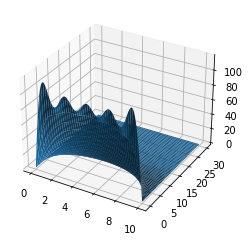

In [8]:
x = np.linspace(0,10,100)
y = np.linspace(0,30,300)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,T(10,X,Y))
plt.show()

In [9]:
degree_step = 1
def plotT3D(N=1,elev=0,ymax=30,azim=0):
    x = np.linspace(0,10,100)
    y = np.linspace(0,ymax,300)
    X,Y = np.meshgrid(x,y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X,Y,T(N,X,Y))
    ax.view_init(elev=elev,azim=azim)    
    plt.show()
_ = interact(plotT3D,N=(0,200,1),ymax=(10,30,1),azim=(0,360,degree_step),elev=(0,360,degree_step))

interactive(children=(IntSlider(value=1, description='N', max=200), IntSlider(value=0, description='elev', max…